#### Question 1

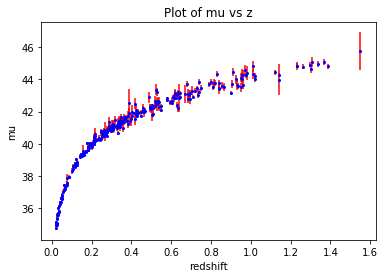

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
from scipy import integrate

data_file = np.loadtxt('sndata.txt') #reading the sndata document

dataset = data_file

z = dataset[:,0] #redshift
mu = dataset[:,1] #distance modulus
dmu = dataset[:,2] #distance modulus observed


plt.errorbar(z,mu,yerr=[dmu,dmu],fmt='bo', ecolor='r',markersize='2')


plt.xlabel('redshift')
plt.ylabel('mu')

plt.title('Plot of mu vs z')
plt.show()

#### Question 2

In [2]:

#Mpc = (3.09) * (10 ** 22)
Mpc = 1

c = 300000 #3e5. km/s
Ho = 70 #km/s/mpc

#Equation 2
def DL(zz, omegaM):
    p1 = (c/70)*(1+zz)
    p2 = lambda zz:  (1/np.sqrt(omegaM*np.power(1+zz,3)+(1-omegaM)))
    p3 = integrate.romberg(p2,0,zz)
    p4 = p1*p3
    return p4


#I'm printing the DL of z = 1 and omega M of 0.3 just to show if the fuction works
print("DL: ")
print(DL(1,0.3)) 

#equation 1
def DistMod(zz, omegaM):
    dl = DL(zz, omegaM)
    theLog = math.log10(dl / Mpc)
    dMod = 5 * theLog + 25.
    return dMod


#I'm printing the Distance modulus of z = 1 and omega M of 0.3 just to show if the fuction works
print("dmod: ")
print(DistMod(1,0.3))


DL: 
6612.231997954236
dmod: 
44.10174041450291


#### Question 3

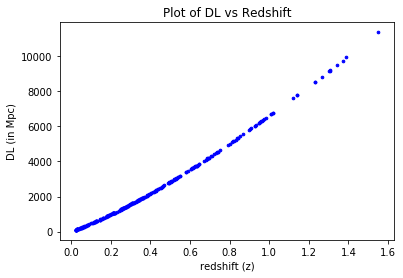

In [27]:
#I made an empty list which will hold the results. This list will help with plotting the graph

listOfRes = []

for counter in z:
    plotDL = DL(counter,0.3)
    listOfRes.append(plotDL)

plt.scatter(z,listOfRes,color='b',s=7)


plt.xlabel('redshift (z)')
plt.ylabel('DL (in Mpc)')

plt.title('Plot of DL vs Redshift')
plt.show()


#### Question 4

In [4]:
#I made a list for the results of each omega, this will make it easier to plot

listOmega01 = []
listOmega03 = []
listOmega10 = []

for counter in z:
    plotDL = DistMod(counter,0.1)
    listOmega01.append(plotDL)

for counter in z:
    plotDL = DistMod(counter,0.3)
    listOmega03.append(plotDL)
    
for counter in z:
    plotDL = DistMod(counter,1.0)
    listOmega10.append(plotDL)



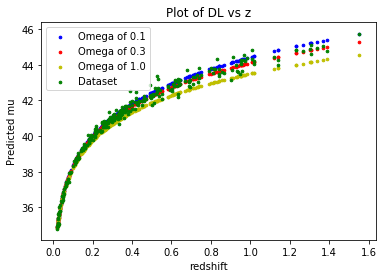

In [26]:
#This block is strictly for drawing the graph

#This part creates 3 scatter plots of different colours
plt.scatter(z,listOmega01, label='Omega of 0.1' ,color='b',s=7)
plt.scatter(z,listOmega03, label='Omega of 0.3', color='r',s=7)
plt.scatter(z,listOmega10,label='Omega of 1.0',color='y',s=7)

plt.scatter(z,mu,label='Dataset',color='g',s=7)


plt.xlabel('redshift')
plt.ylabel('Predicted mu')

plt.title('Plot of DL vs z')
plt.legend()
plt.show()

#### Question 5

In [6]:
def X2(obs, zz, smallSigma, omega):
    
    sumHere = []
    for i in range(len(obs)):
        
        model = DistMod(zz[i],omega)
            
        top = (obs[i] - model)**2
        summ = top/(smallSigma[i]**2)

        sumHere.append(summ)
        
    results = sum(sumHere)
    return results


#### Question 6

In [7]:
minArray = []


omegaValues = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in omegaValues:
    x2result=(X2(mu,z,dmu, i))
    minArray.append(x2result)

    
    
print(minArray)

[1306.6460228696972, 817.8607002832105, 611.0975876950572, 560.4668615123185, 612.0122417543982, 736.1591151410263, 914.5443969655885, 1134.8463147425346, 1388.342218508024, 1668.6094794497174, 1970.7738804076498]


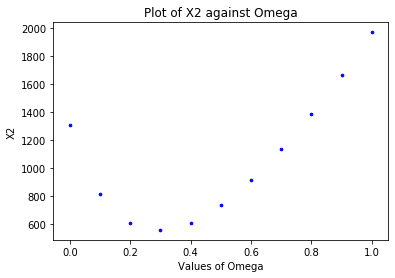

In [30]:
plt.scatter(omegaValues,minArray, color='b',s=7)

plt.ylabel('X2')
plt.xlabel('Values of Omega')

plt.title('Plot of X2 against Omega')

plt.show()